In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
train_dataset_path = '/content/drive/MyDrive/Poribohon-BD/train/'
validation_dataset_path = '/content/drive/MyDrive/Poribohon-BD/validation/'

In [3]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

In [6]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 7271 images belonging to 16 classes.


In [7]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 873 images belonging to 16 classes.


In [8]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Bicycle
1 : Bike
2 : Boat
3 : Bus
4 : Car
5 : Cng
6 : Easy-bike
7 : Horse-cart
8 : Launch
9 : Leguna
10 : Multi-class Vehicles
11 : Rickshaw
12 : Tractor
13 : Truck
14 : Van
15 : Wheelbarrow


In [9]:
image_size = [150,150]
den_net_201 = tf.keras.applications.DenseNet201(input_shape = image_size+[3],weights='imagenet',include_top = False)
den_net_201.output
for layer in den_net_201.layers :
  layer.trainable = False

74850304/74836368 [==============================] - 1s 0us/step


In [10]:
x = Flatten()(den_net_201.output)
prediction = Dense(16,activation="softmax")(x)
model = Model(inputs=den_net_201.input,outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 156, 156, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 75, 75, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1/conv[0][0]']         

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
epoch = 10
history = model.fit(train_generator,
                    steps_per_epoch = None,
                    epochs = epoch,
                    validation_data = validation_generator,
                    validation_steps = None
                    )

Epoch 1/10
139/228 [=================>............] - ETA: 18:13 - loss: 2.7565 - accuracy: 0.6331

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


228/228 [==============================] - 3109s 14s/step - loss: 2.5069 - accuracy: 0.6725 - val_loss: 3.3363 - val_accuracy: 0.6575
Epoch 2/10
228/228 [==============================] - 1414s 6s/step - loss: 1.2257 - accuracy: 0.8204 - val_loss: 3.2555 - val_accuracy: 0.7194
Epoch 3/10
228/228 [==============================] - 1415s 6s/step - loss: 0.7776 - accuracy: 0.8849 - val_loss: 3.8119 - val_accuracy: 0.6907
Epoch 4/10
228/228 [==============================] - 1420s 6s/step - loss: 0.5718 - accuracy: 0.9121 - val_loss: 4.6136 - val_accuracy: 0.7239
Epoch 5/10
228/228 [==============================] - 1418s 6s/step - loss: 0.5160 - accuracy: 0.9228 - val_loss: 4.6923 - val_accuracy: 0.7159
Epoch 6/10
228/228 [==============================] - 1429s 6s/step - loss: 0.3505 - accuracy: 0.9453 - val_loss: 4.9053 - val_accuracy: 0.6999
Epoch 7/10
228/228 [==============================] - 1438s 6s/step - loss: 0.3293 - accuracy: 0.9454 - val_loss: 4.5970 - val_accuracy: 0.7274
Ep

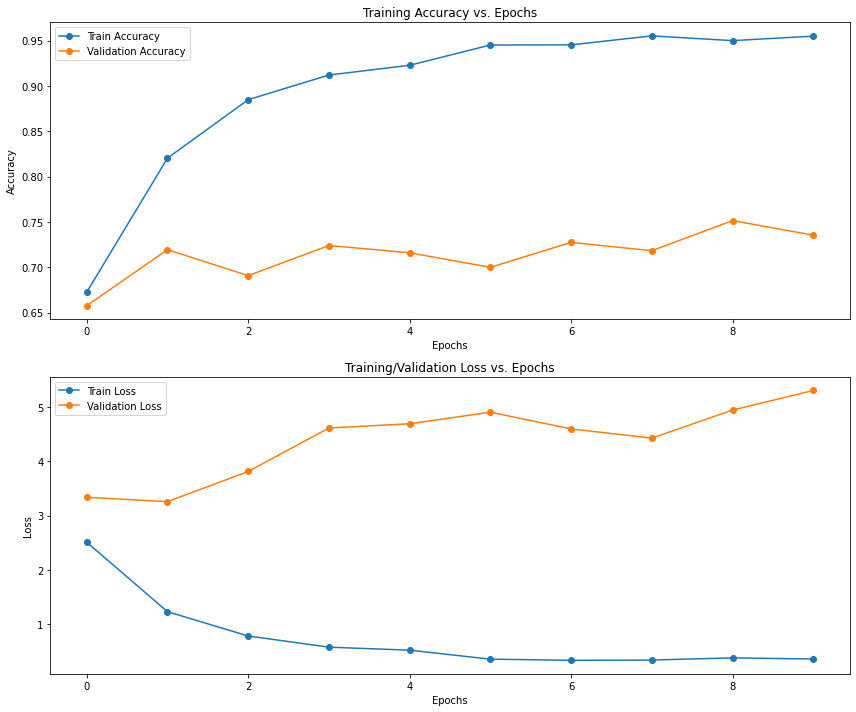

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
test_dataset = '/content/drive/MyDrive/Poribohon-BD/test/'

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 910 images belonging to 16 classes.


In [ ]:
predictions = model.predict(test_generator)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=BATCH_SIZE)
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

In [ ]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(16, 16)

plt.figure(figsize = (30, 15))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [ ]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

                      precision    recall  f1-score   support

             Bicycle       0.95      0.76      0.84        70
                Bike       0.80      0.95      0.87        86
                Boat       0.88      0.95      0.91        61
                 Bus       0.93      0.62      0.75        45
                 Car       0.71      1.00      0.83        70
                 Cng       0.90      0.72      0.80        53
           Easy-bike       0.84      0.77      0.80        61
          Horse-cart       0.95      0.72      0.82        25
              Launch       0.81      0.91      0.86        66
              Leguna       0.75      0.57      0.65        21
Multi-class Vehicles       0.36      0.40      0.38        91
            Rickshaw       0.64      0.76      0.69        49
             Tractor       0.98      0.96      0.97        55
               Truck       0.77      0.81      0.79        73
                 Van       0.67      0.54      0.60        61
       